In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
directory="DATA/train/"
classses=os.listdir(directory)

In [6]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

DATA/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
DATA/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
DATA/train/normal
DATA/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [7]:
import random
random.shuffle(data1)

In [8]:
len(data1)

613

In [9]:
classses

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [10]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [11]:
x=np.array(x)
y=np.array(y)
x=x/255 #feature scaling

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

Using TensorFlow backend.


In [13]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=x.shape[1:]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#Extracting Image Features
    tf.keras.layers.Flatten(),# converting 2 dimensional data to one dimensional
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)])

In [14]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=['accuracy']) 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [16]:
history=model.fit(x=X_train,y=y_train,epochs=15,validation_data= (X_test, y_test))

score = model.evaluate(x=X_test,y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
15/15 [==============================] - 60s 4s/step - loss: 1.3402 - accuracy: 0.3268 - val_loss: 1.1976 - val_accuracy: 0.4610
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 1.0827 - accuracy: 0.4967 - val_loss: 0.9455 - val_accuracy: 0.6494
Epoch 3/15
15/15 [==============================] - 54s 4s/step - loss: 0.8476 - accuracy: 0.6340 - val_loss: 0.8349 - val_accuracy: 0.7597
Epoch 4/15
15/15 [==============================] - 53s 4s/step - loss: 0.5951 - accuracy: 0.7843 - val_loss: 0.9972 - val_accuracy: 0.7468
Epoch 5/15
15/15 [==============================] - 53s 4s/step - loss: 0.6127 - accuracy: 0.7756 - val_loss: 0.6250 - val_accuracy: 0.7662
Epoch 6/15
15/15 [==============================] - 53s 4s/step - loss: 0.4852 - accuracy: 0.8083 - val_loss: 0.5957 - val_accuracy: 0.7727
Epoch 7/15
15/15 [==============================] - 54s 4s/step - loss: 0.3710 - accuracy: 0.8606 - val_loss: 0.5907 - val_accuracy: 0.7597
Epoch 8/15
15/15 [==

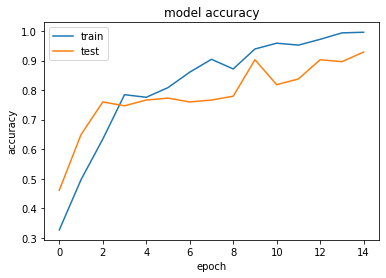

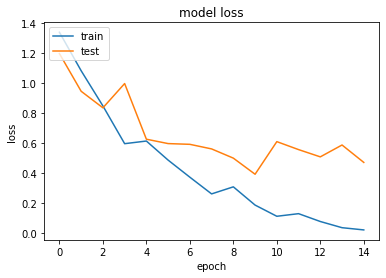

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save("lung.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: lung.hp5\assets


In [22]:
import os
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
for i in os.listdir("test/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('lung.hp5')
    classes = {'TRAIN':['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']}
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="test/"+"//"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    img_4d=img_4d/255
    model = keras.models.load_model('lung.hp5')
    predictions = model.predict_classes(img_4d)
    print(predictions[0])
    predicted_class = classes['TRAIN'][predictions[0]]
    print(predicted_class)
    list1=[0,1,3]
    if predictions[0] in list1:
        print("cancer is Detected and Detected type is "+str(predicted_class.lower()))
       # print('We think that is {}.'.format(predicted_class.lower()))
    else:
        print("Congratulation lung is {}".format(predicted_class.lower()))
    print("-----------------------------------------------")

000108 (3).png
<class 'numpy.ndarray'>
0
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
cancer is Detected and Detected type is adenocarcinoma_left.lower.lobe_t2_n0_m0_ib
-----------------------------------------------
000109 (2).png
<class 'numpy.ndarray'>
1
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
cancer is Detected and Detected type is large.cell.carcinoma_left.hilum_t2_n2_m0_iiia
-----------------------------------------------
000109 (4).png
<class 'numpy.ndarray'>
3
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
cancer is Detected and Detected type is squamous.cell.carcinoma_left.hilum_t1_n2_m0_iiia
-----------------------------------------------
000109 (5).png
<class 'numpy.ndarray'>
1
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
cancer is Detected and Detected type is large.cell.carcinoma_left.hilum_t2_n2_m0_iiia
-----------------------------------------------
